# Confirmatory Factor Analysis & Structural Equation Modelling

## Exercise 1: Preparation and data exploration

Load the `semopy`package and the `HolzingerSwineford1939` dataset.  If you want to keep your dataset small and organized, you can use `.drop()` to remove the columns `x1`, `x4`and `x7`.


In [1]:
# Uncomment the following line to run in Google Colab
# !pip install semopy
import semopy

# Import your data here
data = semopy.examples.holzinger39.get_data()

# Drop the unnecessary columns/variables
data = data.drop(columns=['x1', 'x4', 'x7'])
print(data)

# Alternative way to drop columns:
# data = data.drop(['x1', 'x4', 'x7'], axis = "columns")
# print(data)


      id  sex  ageyr  agemo       school  grade    x2     x3    x5        x6  \
1      1    1     13      1      Pasteur    7.0  7.75  0.375  5.75  1.285714   
2      2    2     13      7      Pasteur    7.0  5.25  2.125  3.00  1.285714   
3      3    2     13      1      Pasteur    7.0  5.25  1.875  1.75  0.428571   
4      4    1     13      2      Pasteur    7.0  7.75  3.000  4.50  2.428571   
5      5    2     12      2      Pasteur    7.0  4.75  0.875  4.00  2.571429   
..   ...  ...    ...    ...          ...    ...   ...    ...   ...       ...   
297  346    1     13      5  Grant-White    8.0  7.00  1.375  4.25  1.000000   
298  347    2     14     10  Grant-White    8.0  6.00  1.625  4.00  1.000000   
299  348    2     14      3  Grant-White    8.0  5.50  1.875  5.75  4.285714   
300  349    1     14      2  Grant-White    8.0  6.75  0.500  4.50  2.000000   
301  351    1     13      5  Grant-White    NaN  6.00  3.375  5.75  3.142857   

       x8        x9  
1    5.75  6.3611

## Exercise 2: Fit a CFA model

Fit a CFA model with 3 latent variables. `x2` and `x3` should load onto `visual`, `x5` and `x6` shoud load onto `text`, `x8` and `x9` should load onto `speed`. Assume all latent factors to be uncorrelated with each other. After Specifying the model, fit it and inspect the model estimates as well as the model fit measures. 

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.243
Number of iterations: 16
Params: 0.646 0.753 0.644 0.710 1.347 0.699 0.683 0.984 0.313 0.432 0.312 0.721
      lval  op    rval  Estimate  Std. Err    z-value p-value
0       x2   ~  visual  1.000000         -          -       -
1       x3   ~  visual  0.645532  0.069086   9.343818     0.0
2       x5   ~    text  1.000000         -          -       -
3       x6   ~    text  0.753297  0.039054  19.288631     0.0
4       x8   ~   speed  1.000000         -          -       -
5       x9   ~   speed  0.644022  0.052423  12.285023     0.0
6    speed  ~~  visual  0.000000         -          -       -
7    speed  ~~    text  0.000000         -          -       -
8    speed  ~~   speed  0.710144  0.055045  12.901184     0.0
9     text  ~~  visual  0.000000         -          -       -
10    text  ~~    text  1.346736  0.081896  16.444561     0.0
11  visual  ~~  

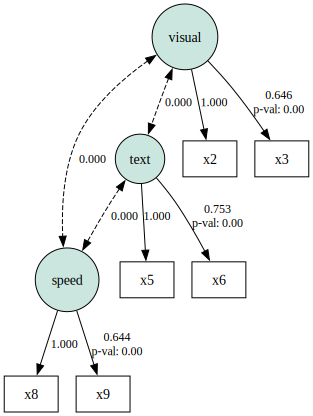

In [4]:
# Specify the model
desc = '''
    visual =~ x2 + x3
    text =~ x5 + x6
    speed =~ x8 + x9
    
    # Set correlations to zero
    speed ~~ 0 * visual
    speed ~~ 0 * text
    text ~~ 0 * visual
'''

# Fit the model
model = semopy.Model(desc)
results = model.fit(data)
print(results)

# Get the estimates
estimates = model.inspect()
print(estimates)

# Get the fit measures
stats = semopy.calc_stats(model)
print(stats.T)

# Visualize the model
semopy.semplot(model, 'figures/holzinger39.png', plot_covs=True)


## Exercise 3: Fit a SEM model

Adapt your model from above to include a structural part, meaning a unidirectional association on the level of latent variables. Print the model estimates and the model fit statistics. Does the CFA or the SEM model provide better fit? Provide an explanation for your conclusion.

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.037
Number of iterations: 30
Params: 1.356 1.114 1.742 0.117 0.526 0.139 0.245 0.911 0.232 1.049 0.663 0.749 0.066 0.759 0.219
      lval  op    rval  Estimate  Std. Err   z-value   p-value
0   visual   ~    text  0.116602  0.053476  2.180459  0.029223
1   visual   ~   speed  0.526146   0.14389  3.656581  0.000256
2    speed   ~    text  0.139384  0.047092  2.959813  0.003078
3       x2   ~  visual  1.000000         -         -         -
4       x3   ~  visual  1.355716  0.317519  4.269713   0.00002
5       x5   ~    text  1.000000         -         -         -
6       x6   ~    text  1.113639  0.211906  5.255348       0.0
7       x8   ~   speed  1.000000         -         -         -
8       x9   ~   speed  1.742380  0.425147  4.098305  0.000042
9    speed  ~~   speed  0.244558  0.074144  3.298424  0.000972
10    text  ~~    text  0.911104  0.205777  4.427

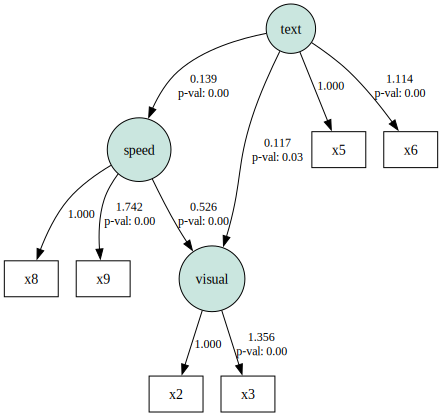

In [ ]:
# Specify the model
desc2 = '''
    # Measurement model
    visual =~ x2 + x3
    text =~ x5 + x6
    speed =~ x8 + x9
    
    # Structural model
    visual ~ text
    speed ~ text
    visual~ speed
'''

# Fit the model
model2 = semopy.Model(desc2)
results2 = model2.fit(data)
print(results2)

# Get the  estimates
estimates2 = model2.inspect()
print(estimates2)

# Get the fit measures
stats2 = semopy.calc_stats(model2)
print(stats2.T)

# Visualize the model
semopy.semplot(model2, 'figures/holzinger39_2.png')

## Voluntary exercise 1: Higher level factors

Go back to your CFA model and add a higher level factor onto which all latent variables load onto. Name it `intelligence`. Does the higher level factor improve model fit?

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.037
Number of iterations: 39
Params: 1.363 1.116 1.721 0.897 1.203 0.143 0.151 0.766 0.124 1.051 0.659 0.751 0.064 0.757 0.227
            lval  op          rval  Estimate  Std. Err   z-value   p-value
0           text   ~  intelligence  1.000000         -         -         -
1          speed   ~  intelligence  0.897471  0.351128  2.555968  0.010589
2         visual   ~  intelligence  1.203470  0.444534  2.707259  0.006784
3             x2   ~        visual  1.000000         -         -         -
4             x3   ~        visual  1.363364   0.32002  4.260246   0.00002
5             x5   ~          text  1.000000         -         -         -
6             x6   ~          text  1.116107  0.213113  5.237161       0.0
7             x8   ~         speed  1.000000         -         -         -
8             x9   ~         speed  1.720615  0.415237  4.143696  0

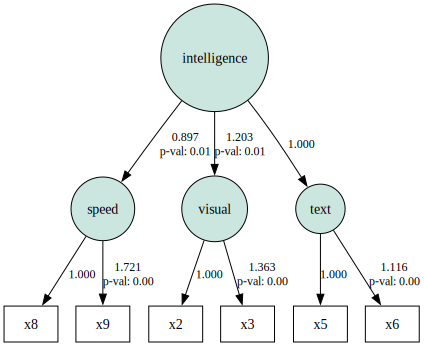

In [7]:
# Specify the model
desc3 = '''
    visual =~ x2 + x3
    text =~ x5 + x6
    speed =~ x8 + x9
    
    # Higher level factor
    intelligence =~ text + speed + visual
'''

# Fit the model
model3 = semopy.Model(desc3)
results3 = model3.fit(data)
print(results3)

# Print the model estimates
estimates3 = model3.inspect()
print(estimates3)

# Print the model fit measures
stats3 = semopy.calc_stats(model3)
print(stats3.T)

# Visualize the model
semopy.semplot(model3, 'figures/holzinger39_3.png')

## Voluntary exercise 2: Advanced models I

Now go back to your SEM model and modify it in a way such that the factor variance of the `speed` factor is fixed to 1. How does that affect the interpretation of the loading associated with that factor?

      lval  op    rval  Estimate  Std. Err    z-value   p-value
0   visual   ~    text  0.183745  0.063006   2.916327  0.003542
1   visual   ~   speed  0.144844  0.057291   2.528225  0.011464
2    speed   ~    text  0.171449   0.06553   2.616357  0.008887
3       x2   ~  visual  1.000000         -          -         -
4       x3   ~  visual  1.248551  0.367263   3.399608  0.000675
5       x5   ~    text  1.000000         -          -         -
6       x6   ~    text  1.179038  0.254336   4.635755  0.000004
7       x8   ~   speed  1.000000         -          -         -
8       x9   ~   speed  0.493857  0.065675   7.519672       0.0
9    speed  ~~   speed  1.000000         -          -         -
10    text  ~~    text  0.860697  0.215062   4.002082  0.000063
11  visual  ~~  visual  0.304534  0.108182   2.815018  0.004877
12      x2  ~~      x2  1.020511  0.134482   7.588483       0.0
13      x3  ~~      x3  0.711627  0.174637   4.074899  0.000046
14      x5  ~~      x5  0.799461  0.1908

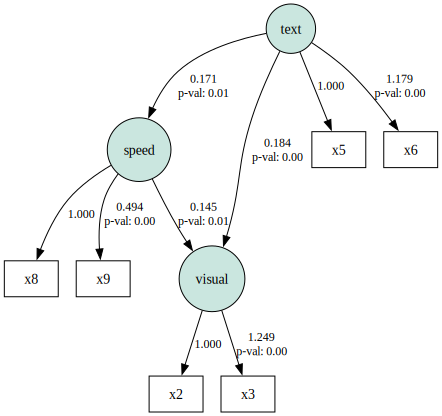

In [8]:
##solution
# Specify the model
desc4 = '''
    # Measurement model
    visual =~ x2 + x3
    text =~ x5 + x6
    speed =~ x8 + x9

    # Structrual model
    visual ~ text
    speed ~ text
    visual ~ speed

    # Fix factor variance to 1
    speed ~~ 1*speed
'''

# Fit the model
model4 = semopy.Model(desc4)
results4 = model4.fit(data)

# Print the model estimates
estimates4 = model4.inspect()
print(estimates4)

# Print the model fit measures
stats4 = semopy.calc_stats(model4)
print(stats4.T)

# Visualize the model
semopy.semplot(model4, 'figures/holzinger39_4.png')

## Voluntary exercise 3: Advanced models II

Re-load the dataset again, this time without deleting any variables. Specify and evaluate a model that tests the following hypothesis:

- `x1`,`x2` and `x3` should load onto `visual`, `x4`,`x5` and `x6` shoud load onto `text`, `x7`,`x8` and `x9` should load onto `speed`.
- `visual` and `text` load onto a higher level factor called `intelligence`.
- `intelligence` explains 100% of the covariance between `visual` and `text`.
- `intelligence` predicts `speed`. 


            lval  op          rval  Estimate  Std. Err    z-value   p-value
0           text   ~  intelligence  1.000000         -          -         -
1         visual   ~  intelligence  1.511090  0.394682   3.828623  0.000129
2          speed   ~  intelligence  0.641936  0.150723   4.259032  0.000021
3             x1   ~        visual  1.000000         -          -         -
4             x2   ~        visual  0.554007   0.09969   5.557311       0.0
5             x3   ~        visual  0.730062  0.109142    6.68908       0.0
6             x4   ~          text  1.000000         -          -         -
7             x5   ~          text  1.112913  0.065402  17.016368       0.0
8             x6   ~          text  0.926028  0.055437  16.704137       0.0
9             x7   ~         speed  1.000000         -          -         -
10            x8   ~         speed  1.181997  0.165403   7.146174       0.0
11            x9   ~         speed  1.083819  0.151597   7.149338       0.0
12          

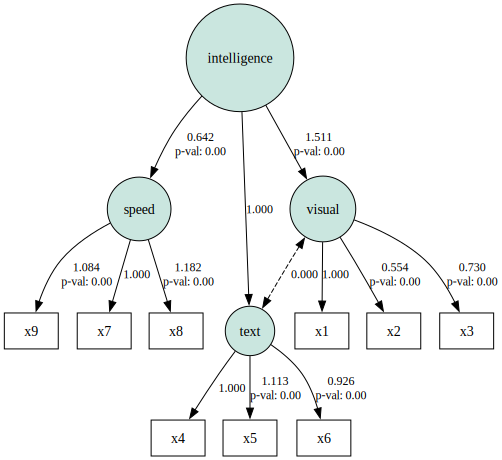

In [10]:
# Load the dataset
data2 = semopy.examples.holzinger39.get_data()

# Specify the model
desc5 = '''
    visual =~ x1 + x2 + x3
    text =~ x4 + x5 + x6
    speed =~ x7 + x8 + x9

    # Add a higher level factor
    intelligence =~ text + visual

    # No residual covariance between text and visual
    text ~~ 0*visual

    # Intelligence predicts speed
    speed ~ intelligence
'''

# Fit the model
model5 = semopy.Model(desc5)
results5 = model5.fit(data2)

# Get model estimates
estimates5 = model5.inspect()
print(estimates5)

# Get fit statistics
stats5 = semopy.calc_stats(model5)
print(stats5.T)

# Visualize the model
semopy.semplot(model5, 'figures/holzinger39_5.png', plot_covs=True)